# __Model Training and Evaluation__
1. Linear Regression
2. Decision Tree
3. Random Forest
4. SVM

In [42]:
## importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## models, metrics and k-fold cross validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
## loading the data

X_train = pd.read_csv('../data/X_train_balanced.csv')
y_train = pd.read_csv('../data/y_train_balanced.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_test = pd.read_csv('../data/y_test.csv')
X_train.head()

,OZONE_MAX,Lattitude,Longitude,PM10,PM2.5,SO2,NO2,CO,CO2,Temperature
0,8.0,18.515570,73.824393,14.5,13.0,2.0,22.0,77.0,415.0,32.50000
1,55.0,18.482239,73.858092,30.0,19.0,11.0,30.0,33.5,0.0,29.41539
2,52.0,18.482239,73.858092,21.0,17.0,6.5,50.5,40.5,23.0,28.50000
3,14.0,18.451716,73.856170,24.5,19.5,5.5,104.0,115.0,14.5,33.50000
4,0.0,18.451716,73.856170,12.0,9.0,8.0,94.0,74.5,0.0,26.50000


In [44]:
## converting to numpy arrays

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

y_train = y_train.ravel()
y_test = y_test.ravel()

In [45]:
## shape of the data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(93807, 10)
(93807,)
(30962, 10)
(30962,)


## __Linear Regression__

In [46]:
## training Linear Regression

lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
## predicting on the test set

y_pred = lr_regressor.predict(X_test)

In [48]:
## calculating the metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:      ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2 * 100)

Mean Squared Error:       1051.7740184185886
Root Mean Squared Error:  32.43106563803583
R2 Score:                 75.7185992828703


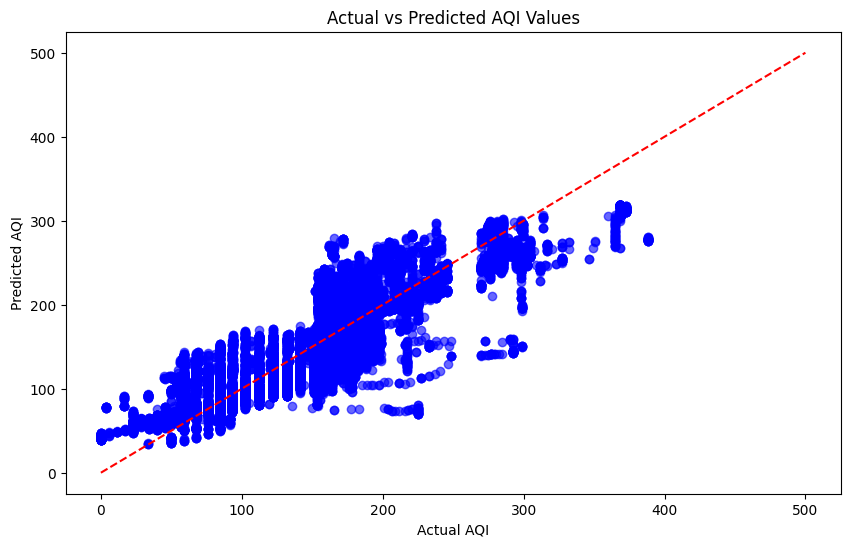

In [49]:
## plotting a scatter plot of predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 500], [0, 500], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI Values")
plt.show()

## __Random Forest Regression__

In [53]:
## training Random Forest Regressor

rf_regressor = RandomForestRegressor(n_estimators=8, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=8, random_state=42)

In [54]:
y_pred = rf_regressor.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:      ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2 * 100)

Mean Squared Error:       1.57065395503554
Root Mean Squared Error:  1.2532573379141014
R2 Score:                 99.96373966517304


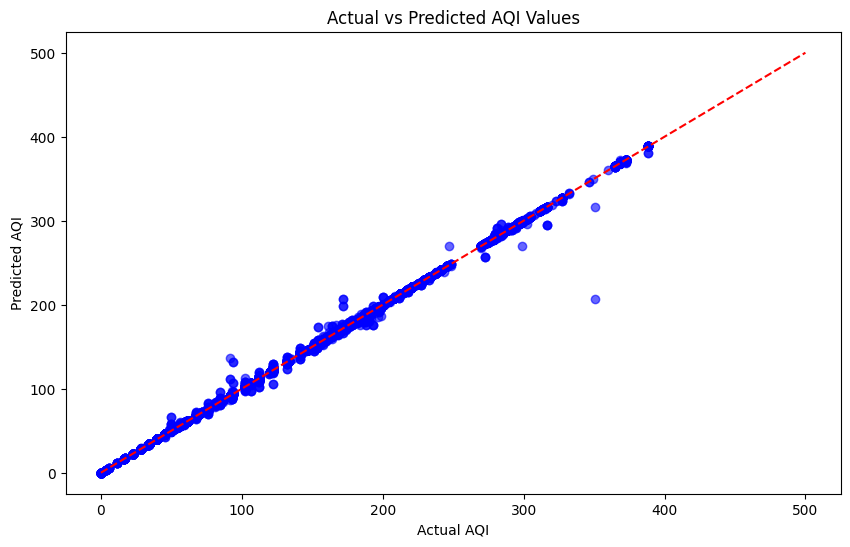

In [56]:
## plotting a scatter plot of predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 500], [0, 500], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI Values")
plt.show()

## __Decision Tree Regression__

In [57]:
## training Decision Tree Regressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [58]:
## training Gradient Boosting Regressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred = gb_regressor.predict(X_test)

In [59]:
## calculating the metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:      ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2 * 100)

Mean Squared Error:       72.81042750336753
Root Mean Squared Error:  8.532902642323275
R2 Score:                 98.31908838245215


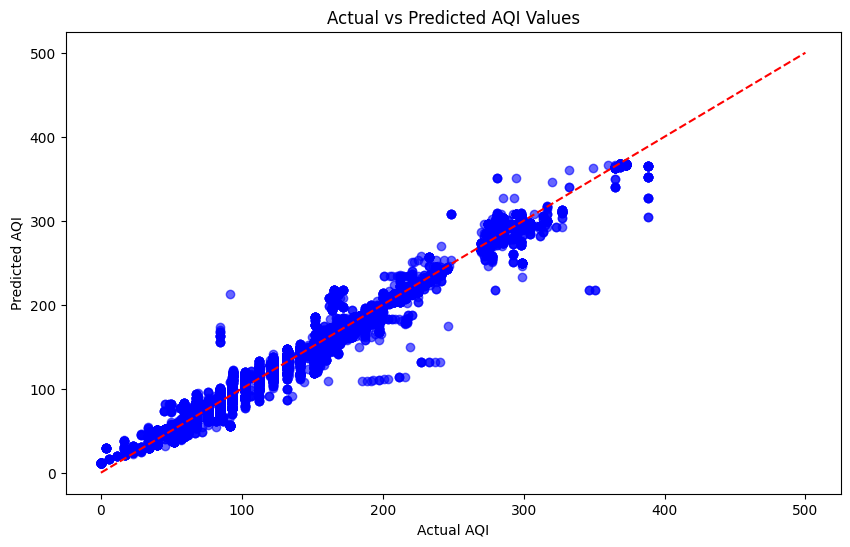

In [60]:
## plotting a scatter plot of predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 500], [0, 500], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI Values")
plt.show()

## __Support Vector Machine__

In [38]:
## training Support Vector Regressor

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

SVR()

In [39]:
## predicting on the test set

y_pred = svr_regressor.predict(X_test)

In [40]:
## calculating the metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:      ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2 * 100)

Mean Squared Error:       817.0886332566479
Root Mean Squared Error:  28.5847622564304
R2 Score:                 81.13657860141161


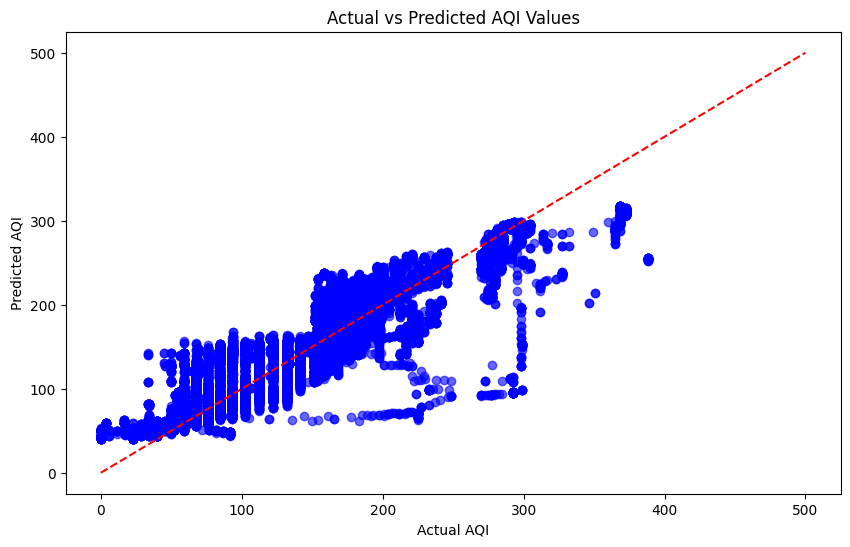

In [41]:
## plotting a scatter plot of predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 500], [0, 500], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI Values")
plt.show()